In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import glob

TensorFlow 2.x selected.


In [0]:
files_circle = glob.glob("/content/drive/My Drive/Shapes/Circle/*")
files_rect = glob.glob("/content/drive/My Drive/Shapes/Rectangle/*")
files_sq = glob.glob("/content/drive/My Drive/Shapes/Squares/*")
files_tri = glob.glob("/content/drive/My Drive/Shapes/Triangles/*")
files_trap = glob.glob("/content/drive/My Drive/Shapes/Trapezium/*")
len(files_circle),len(files_rect),len(files_sq),len(files_tri),len(files_trap)

(106, 113, 103, 153, 113)

In [0]:
import cv2
import matplotlib.pyplot as plt

X,Y=[],[]
for i,shape in enumerate(list([files_circle,files_rect,files_sq,files_tri,files_trap])):
  for img in shape:
    x = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x,(150,150),interpolation = cv2.INTER_AREA)
    x=x/257
    X.append(x)
    Y.append(i) 

len(X),len(Y)    

In [0]:
np.save("/content/drive/My Drive/Shapes/X_Reduced.npy",X)
np.save("/content/drive/My Drive/Shapes/Y_Reduced.npy",Y)

In [0]:
X1 = np.array(X)
print(X1.shape)
X1 = X1.reshape((-1,150,150,1))
X1.shape

(588, 150, 150)


(588, 150, 150, 1)

In [0]:
Y1 = np.array(Y)
Y1 = tf.keras.utils.to_categorical(Y1,num_classes=5)
Y1.shape

(588, 5)

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, Y_train, Y_val = train_test_split(X1,Y1,train_size=0.9,stratify=True)
# len(X_train),len(Y_train)

from sklearn.utils import shuffle
X2, Y2 = shuffle(X1, Y1)

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(128,(3,3),input_shape=(150, 150,1)))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64,(2,2)))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(32,(4,4)))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(16,(3,3)))
  model.add(tf.keras.layers.MaxPool2D())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(256,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(64,activation='relu'))
  model.add(tf.keras.layers.Dense(5,activation='softmax'))

  return model

In [0]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 128)     1280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 74, 74, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 32)       

In [0]:
opt = tf.keras.optimizers.Adam(1e-6,clipvalue=0.25)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath="CheckpointL.h5",verbose=1,save_best_only=True)

In [0]:
tf.keras.backend.clear_session()

In [0]:
model.fit(X2,Y2,batch_size=8,epochs=55,validation_split=0.1,shuffle=True,callbacks=[modelcheckpoint])

In [0]:
model = tf.keras.models.load_model("CheckpointL.h5")

In [0]:
model.save("/content/drive/My Drive/Shapes/ModelBest.h5")

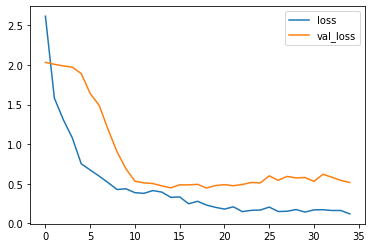

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [0]:
def preprocess(img_path):
    x = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x,(150,150),interpolation = cv2.INTER_AREA)
    x=x/257
    return x

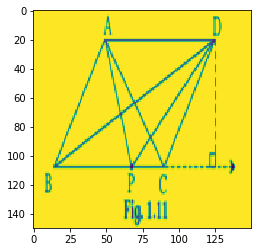

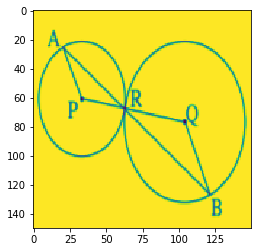

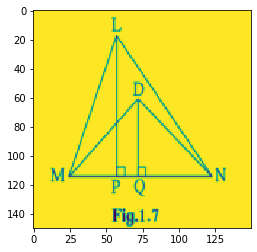

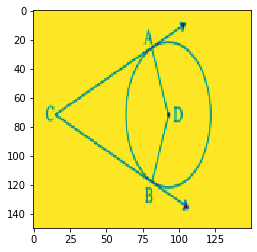

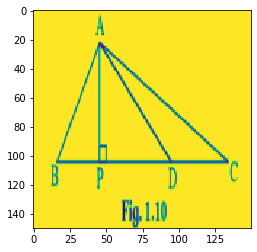

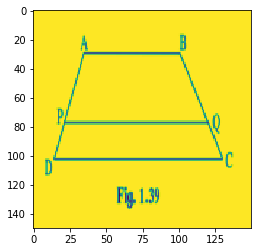

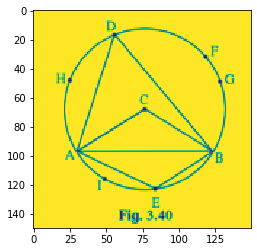

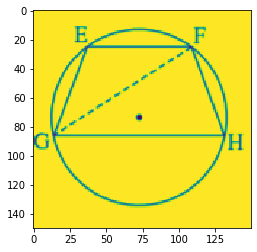

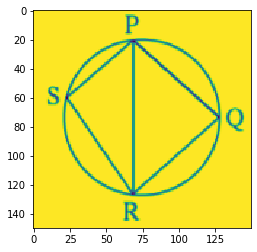

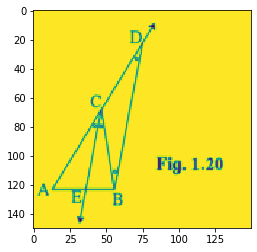

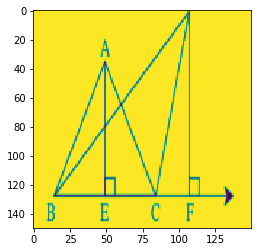

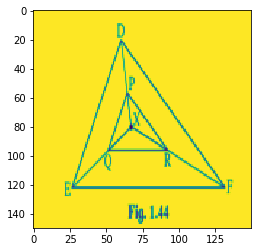

([array([[0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         ...,
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179]]),
  array([[0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         ...,
         [0.9922179, 0.9922179, 0.9922179, ..., 0.9922179, 0.9922179,
          0.9922179],
         [0.9922179, 0.9922179, 0.9922179, ..., 0.

In [0]:
import os,cv2
testlist,test = [],[]
for i in glob.glob('/content/*.png'):
  testlist.append(os.path.basename(i).split('.')[0])
  x = preprocess(i)
  plt.imshow(x)
  plt.show()
  test.append(x)
  

In [0]:
test = np.array(test)
test = test.reshape((-1,150,150,1))
test.shape

(12, 150, 150, 1)

In [0]:
classes = ['circle','rectangle','square','triangle','trapezium']

In [0]:
answers=[]
preds = model.predict_classes(test,verbose=1)
for i in preds:
  answers.append(classes[i])
answers  

12/12 [==============================] - 0s 931us/sample


['trapezium',
 'triangle',
 'triangle',
 'circle',
 'triangle',
 'trapezium',
 'circle',
 'trapezium',
 'circle',
 'triangle',
 'triangle',
 'triangle']